In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from termcolor import colored
from sklearn.metrics import confusion_matrix
import seaborn as sb

In [0]:
data_gen = ImageDataGenerator()

In [0]:
model_params = {
    "batch_size": 32,
    "epochs": 15,
    "dropout": 0.5,
    "learning_rate": 0.0001
}

In [0]:
#preprocessing data (data augmentation)

train_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_data = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [6]:
train_data = data_gen.flow_from_directory('drive/My Drive/Data/chest x-ray dataset/chest_xray/train/', target_size=(224, 224), class_mode='binary', batch_size=model_params["batch_size"])
test_data = data_gen.flow_from_directory('drive/My Drive/Data/chest x-ray dataset/chest_xray/test/', target_size=(224, 224), class_mode='binary', batch_size=model_params["batch_size"])
val_data = data_gen.flow_from_directory('drive/My Drive/Data/chest x-ray dataset/chest_xray/val/', target_size=(224, 224), class_mode='binary', batch_size=model_params["batch_size"])

Found 5056 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 176 images belonging to 2 classes.


In [7]:
print(train_data.class_indices)

{'NORMAL': 0, 'PNEUMONIA': 1}


In [8]:
#checking training data shape
X, y = train_data.next()
print("Input training data shape: ", X[0].shape)
print('Batch shape = %s, min=%.3f, max=%.3f' % (X.shape, X.min(), X.max()))
print(y[0])

Input training data shape:  (224, 224, 3)
Batch shape = (32, 224, 224, 3), min=0.000, max=255.000
1.0


In [9]:
# VGG16 architecture

model = Sequential(name="VGG16 Model")

model.add(Conv2D(64, (3, 3), padding = "same", activation = 'relu', input_shape = (224, 224, 3), name="Conv_Layer_1"))
model.add(Conv2D(64, (3, 3), padding = "same", activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(model_params["dropout"]))

model.add(Conv2D(128, (3, 3), padding = "same", activation = 'relu'))
model.add(Conv2D(128, (3, 3), padding = "same", activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(model_params["dropout"]))

model.add(Conv2D(256, (3, 3), padding = "same", activation = 'relu'))
model.add(Conv2D(256, (3, 3), padding = "same", activation = 'relu'))
model.add(Conv2D(256, (3, 3), padding = "same", activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(model_params["dropout"]))

model.add(Conv2D(512, (3, 3), padding = "same", activation = 'relu'))
model.add(Conv2D(512, (3, 3), padding = "same", activation = 'relu'))
model.add(Conv2D(512, (3, 3), padding = "same", activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(model_params["dropout"]))

model.add(Conv2D(512, (3, 3), padding = "same", activation = 'relu'))
model.add(Conv2D(512, (3, 3), padding = "same", activation = 'relu'))
model.add(Conv2D(512, (3, 3), padding = "same", activation = 'relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Dropout(model_params["dropout"]))

model.add(Flatten())
model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(model_params["dropout"]))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(model_params["dropout"]))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(model_params["dropout"]))

model.add(Dense(1, activation = 'sigmoid'))

model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "VGG16 Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_Layer_1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d (Conv2D)              (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     147584    
___

In [10]:
# epochs = 10
# lrate = 0.0001
decay = model_params["learning_rate"]/model_params["epochs"]

adam = Adam(lr=model_params["learning_rate"], beta_1=0.9, beta_2=0.999, epsilon=None, decay=decay, amsgrad=False)

model.compile(optimizer = adam,
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
#network details for plotting
network_info = []

network_info.append(["PROBLEM TYPE", "Binary Classification"])
network_info.append(["OPTIMIZER", "Adam"])
network_info.append(["BATCH SIZE", model_params["batch_size"]])
network_info.append(["DATA AUGMENTATION", "test/train/val"])
network_info.append(["DENSE ARCHITECTURE", "1024 -> 512 -> 256 -> 1"])
network_info.append(["DROPOUT", model_params["dropout"]])
network_info.append(["EPOCHS", model_params["epochs"]])
network_info.append(["LEARNING RATE", model_params["learning_rate"]])
network_info.append(["DECAY", "lrate/epochs"])
network_info.append(["BETA_1", 0.9])
network_info.append(["BETA_2", 0.999])
network_info.append(["EPSILON", "None"])

In [0]:
def display_acc_loss(history, plot_name, network_details):
  plt.figure(1, figsize=(20, 10))

  #plot train and validation acc
  plt.subplot(221)
  plt.plot(history.history['acc'], 'o-')
  plt.plot(history.history['val_acc'], 's-')
  plt.title("VGG16 Model Accuracy")
  plt.xlabel("epochs")
  plt.ylabel("accuracy")
  plt.legend(["train acc", "val acc"], loc="upper left")
  plt.grid()

  #plot train and validation loss
  plt.subplot(222)
  plt.plot(history.history['loss'], 'o-')
  plt.plot(history.history['val_loss'], 's-')
  plt.title("VGG16 Model Loss")
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.legend(["train loss", "val loss"], loc="upper right")
  plt.grid()
  
  #plot network informnation
  ax = plt.subplot(223)

  the_table = plt.table(cellText=network_details, colWidths=[0.5] * 3, colLabels=['Name', 'Value'], cellLoc='center', loc='center')
  the_table.auto_set_font_size(False)
  the_table.set_fontsize(12)

  for (row, col), cell in the_table.get_celld().items():
    if (row == 0) or (col == -1):
      cell.set_text_props(fontproperties=FontProperties(weight='bold'))
    cell.set_height(.07)
  
  ax.axis("off")
  
  #plot no. of images
  N = 3
  ind = np.arange(N)  # the x locations for the groups
  width = 0.3       # the width of the bars

  ax = plt.subplot(224)

  normal_images = [1261, 88, 234]
  bar_normal = ax.bar(ind, normal_images, width)

  pneumonia_images = [3795, 88, 390]
  bar_pneumonia = ax.bar(ind+width, pneumonia_images, width)
  
  plt.ylim(0, 5000)
  plt.grid()
  ax.set_ylabel('No. of Imgaes')
  ax.set_xticks(ind+width/2)
  ax.set_xticklabels( ('Training Data', 'Validation Data', 'Test Data') )
  ax.legend( (bar_normal, bar_pneumonia), ('NORMAL', 'PNEUMONIA') )
  
  def autolabel(bars):
    for bar in bars:
      ax.text(bar.get_x()+bar.get_width()/2., bar.get_height()+50, "%d"%int(bar.get_height()),  ha="center", va="bottom")
      
  autolabel(bar_normal)
  autolabel(bar_pneumonia)
  
  plt.savefig(plot_name)

  plt.show()

Epoch 1/15
158/158 [==============================] - 1495s 9s/step - loss: 0.8158 - acc: 0.7174 - val_loss: 0.6958 - val_acc: 0.5063
Epoch 2/15
158/158 [==============================] - 141s 894ms/step - loss: 0.5881 - acc: 0.7498 - val_loss: 0.6970 - val_acc: 0.5063
Epoch 3/15
158/158 [==============================] - 141s 894ms/step - loss: 0.5774 - acc: 0.7504 - val_loss: 0.7002 - val_acc: 0.5063
Epoch 4/15
158/158 [==============================] - 142s 897ms/step - loss: 0.5683 - acc: 0.7506 - val_loss: 0.7000 - val_acc: 0.5063
Epoch 5/15
158/158 [==============================] - 142s 896ms/step - loss: 0.4633 - acc: 0.7799 - val_loss: 0.5722 - val_acc: 0.7125
Epoch 6/15
158/158 [==============================] - 141s 895ms/step - loss: 0.2528 - acc: 0.8934 - val_loss: 0.3694 - val_acc: 0.8687
Epoch 7/15
158/158 [==============================] - 141s 894ms/step - loss: 0.1750 - acc: 0.9369 - val_loss: 0.3547 - val_acc: 0.8687
Epoch 8/15
158/158 [==============================

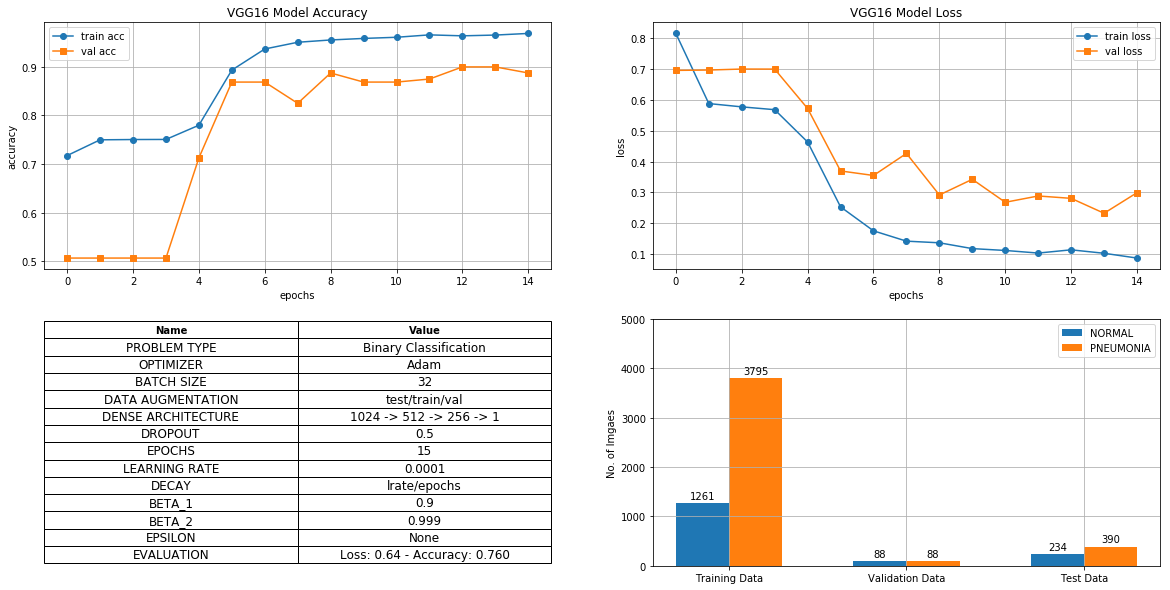

In [13]:
#another try
history = model.fit_generator(train_data,
        steps_per_epoch=train_data.n//train_data.batch_size,
        epochs=model_params["epochs"],
        validation_data=val_data,
        validation_steps=val_data.n//val_data.batch_size)

#another try
# history = model.fit_generator(
#         train_data,
#         epochs=epochs,
#         validation_data=val_data)

model_eval = model.evaluate_generator(test_data)
evaluation = "Loss: %0.2f - Accuracy: %0.3f" % (model_eval[0] , model_eval[1])

network_info.append(["EVALUATION", evaluation])

display_acc_loss(history, "plot.png", network_info)

In [14]:
#check predictions
print("Try some predictions")
print("original value: ", y[0], " - prediction value", model.predict(X)[0])
print("original value: ", y[1], " - prediction value", model.predict(X)[1])
print("original value: ", y[2], " - prediction value", model.predict(X)[2])
print("original value: ", y[3], " - prediction value", model.predict(X)[3])

Try some predictions
original value:  1.0  - prediction value [0.99790394]
original value:  0.0  - prediction value [0.05024463]
original value:  1.0  - prediction value [0.99968445]
original value:  1.0  - prediction value [0.99990314]


In [0]:
model.save("model.h5")

In [0]:
# tfjs.converters.save_keras_model(model, ".")

In [15]:
y_pred = model.predict(X)

y_hat = []

for i in range(len(y_pred)):
  y_hat.append(round(y_pred[i][0]))
  
print(confusion_matrix(y, y_hat))

[[ 7  0]
 [ 0 25]]


In [53]:
cm = tf.contrib.metrics.confusion_matrix(y, y_pred, num_classes=2, dtype=tf.dtypes.float32, name=None, weights=None)
print(cm)

# print(tf.contrib.metrics.confusion_matrix(y, y_hat))

Tensor("confusion_matrix_26/SparseTensorDenseAdd:0", shape=(2, 2), dtype=float32)


In [69]:
tp = 0
tn = 0
fp = 0
fn = 0

for i in range(32):
  if y[i] == 1. and y_hat[i] == 1.:
    print(colored("TRUE POSITIVE", "green"))
    tp+=1
  elif y[i] == 1 and y_hat[i] == 0.:
    print(colored("FALSE NEGATIVE", "red"))
    fn+=1
  elif y[i] == 0. and y_hat[i] == 0.:
    print(colored("TRUE NEGATIVE", "yellow"))
    tn+=1
  elif y[i] == 0 and y_hat[i] == 1.:
    print(colored("FALSE POSITIVE", "red"))
    fp+=1
    
print('\x1b[6;30;47m' + "+---------------------+" + '\x1b[0m')
print(colored("Total TRUE POSITIVE: {}".format(tp), "green"))
print(colored("Total TRUE NEGATIVE: {}".format(tn), "yellow"))
print(colored("Total FALSE POSITIVE: {}".format(fp), "red"))
print(colored("Total FALSE NEGATIVE: {}".format(fn), "red"))
print('\x1b[6;30;47m' + "+---------------------+" + '\x1b[0m')

print('\x1b[6;30;47m' + "[NOTE]: most case sensitive FALSE NEGATIVE." + '\x1b[0m')

TRUE POSITIVE
TRUE NEGATIVE
TRUE POSITIVE
TRUE POSITIVE
TRUE NEGATIVE
TRUE POSITIVE
TRUE POSITIVE
TRUE POSITIVE
TRUE POSITIVE
TRUE NEGATIVE
TRUE POSITIVE
TRUE POSITIVE
TRUE POSITIVE
TRUE NEGATIVE
TRUE POSITIVE
TRUE POSITIVE
TRUE POSITIVE
TRUE POSITIVE
TRUE NEGATIVE
TRUE POSITIVE
TRUE POSITIVE
TRUE POSITIVE
TRUE POSITIVE
TRUE POSITIVE
TRUE POSITIVE
TRUE POSITIVE
TRUE NEGATIVE
TRUE POSITIVE
TRUE POSITIVE
TRUE NEGATIVE
TRUE POSITIVE
TRUE POSITIVE
+---------------------+
Total TRUE POSITIVE: 25
Total TRUE NEGATIVE: 7
Total FALSE POSITIVE: 0
Total FALSE NEGATIVE: 0
+---------------------+
[NOTE]: most case sensitive FALSE NEGATIVE.


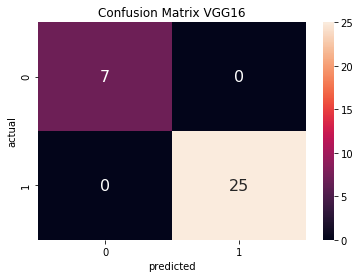

In [111]:
cm_plot = sb.heatmap(uniform_data, annot=True, annot_kws={"size": 16})
cm_plot.set(xlabel='predicted', ylabel='actual', title="Confusion Matrix VGG16")
plt.savefig("cm.png")
plt.show()